# Covariance

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib import colors
#mycmap = colors.ListedColormap(['red','blue'])  # list color for label 0 then 1
np.set_printoptions(precision=2)
import seaborn as sb
from sklearn.preprocessing import StandardScaler

In [2]:
A = np.array([[1, 7, 5], [0, 4, 1], [3, 8, 6]]) # 3 patients, 3 features each
print("matrix A\n",A)

matrix A
 [[1 7 5]
 [0 4 1]
 [3 8 6]]


In [3]:
featureMeansA = np.mean(A,axis=1)
print("Means A",featureMeansA)

Means A [4.33 1.67 5.67]


In [4]:
# Explain the covariance computation.
def my_cov(A,bias=True):
    row=np.ma.size(A,axis=0)
    col=np.ma.size(A,axis=1)
    if bias:
        N = row
    else:
        N = row-1
    covA = np.zeros([row,col])
    cMeans = np.mean(A,axis=1)
    for r in range(0,row):
        for c in range(0,col):
            # Numpy does element-wise subtraction.
            # Numpy dot product converts 2nd argument to row vector.
            # Column dot row = matrix.
            # Without numpy, this would be its own row+col nested for loop.
            covA[r][c] = (A[r]-cMeans[r]).dot(A[c]-cMeans[c])
    # Numpy does element-wise division.
    return covA/N
print("cov(A)\n",my_cov(A))

cov(A)
 [[6.22 3.78 5.11]
 [3.78 2.89 3.22]
 [5.11 3.22 4.22]]


cov(A)
[[6.22 3.78 5.11]
 [3.78 2.89 3.22]
 [5.11 3.22 4.22]]


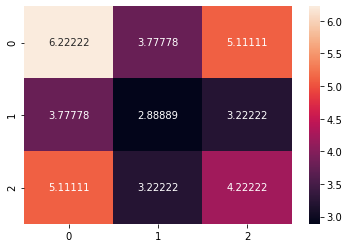

In [5]:
def plot_covariance(X):
    sb.heatmap(np.cov(X,bias=True), annot=True, fmt='g')
print("cov(A)")
print(np.cov(A,bias=True))
plot_covariance(A)

matrix B
 [[ 1 -1  1]
 [ 4 -4  4]
 [ 3 -3  3]]
cov(B)


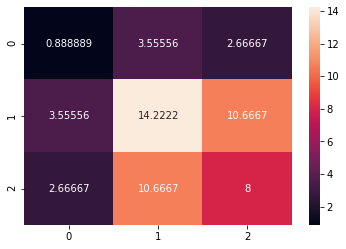

In [6]:
# Covariance is sensitive to scaling
B = np.array([[1, -1, 1], [4, -4, 4], [3, -3, 3]])
print("matrix B\n",B)
print("cov(B)")
plot_covariance(B)

matrix C
 [[-1.34  1.34 -1.34]
 [ 1.07 -1.07  1.07]
 [ 0.27 -0.27  0.27]]
cov(C)


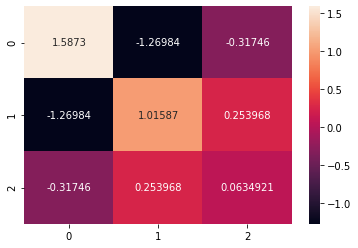

In [7]:
# Somewhat different matrix when scaled
C = StandardScaler().fit_transform(B)
print("matrix C\n",C)
print("cov(C)")
plot_covariance(C)